Hello all ........

> Hope you are doing good.......
I am Jayati Vijaywargiya, and here I bring a small tutorial to start working on Convolution Neural Network using tensorflow. In this excercise we will


*   Load and analyze MNIST dataset
*   Divide dataset in training, testing and validation dataset
*   Prepare a basic convolutional neural network model for classification
*   Compile the model
*   Display the model summary
*   Use cross-entropy loss and accuracy metrics for the model prepared
*   Train the network
*   Validate the network using validate set and show the results

So lets get started









In [108]:
import matplotlib.pyplot as plt
import numpy as np
import tensorflow as tf
import tensorflow_datasets as tfds
from tensorflow.keras import datasets,layers, models
from sklearn.model_selection import train_test_split

In the above step we imported all the necessary libraries, we would be using

Now, we will load the data set,
> Before that, let me brief a little bit about dataset.
>>The MNIST dataset is an acronym that stands for the Modified National Institute of Standards and Technology dataset. It is a dataset of 60,000 small square 28×28 pixel grayscale images of handwritten single digits between 0 and 9.
>>>It is loaded in 2 sets, training set of 60000 images and testing set of 10000 images


In [55]:
(Itrain_images, Itrain_labels), (test_images, test_labels) = datasets.mnist.load_data()

In [56]:
np.shape(train_images_set1)

(60000, 28, 28, 1)

In [57]:
train_images, val_images , train_labels, val_labels = train_test_split(Itrain_images, Itrain_labels, 
                                                    train_size=0.8, 
                                                    random_state=42)

In the above code, we have divided the training and validation data from the training data set.


In [58]:
np.shape(train_images)

(48000, 28, 28)

In [59]:
np.shape(val_images)

(12000, 28, 28)

Now, we will see the size of each training data, the class labels and the number of classes in the training dataset


In [60]:
print(' Image size = ', np.shape(train_images[1]))
print(' Labels =' , np.unique(train_labels))
print('Number of classes', np.size(np.unique(train_labels)))

 Image size =  (28, 28)
 Labels = [0 1 2 3 4 5 6 7 8 9]
Number of classes 10


In this dataset, we have each data as a 28*28 image, and we have 10 classes, labelled as 0,1,2,3,4,5,6,7,8,9

Now, we will plot a few training data images

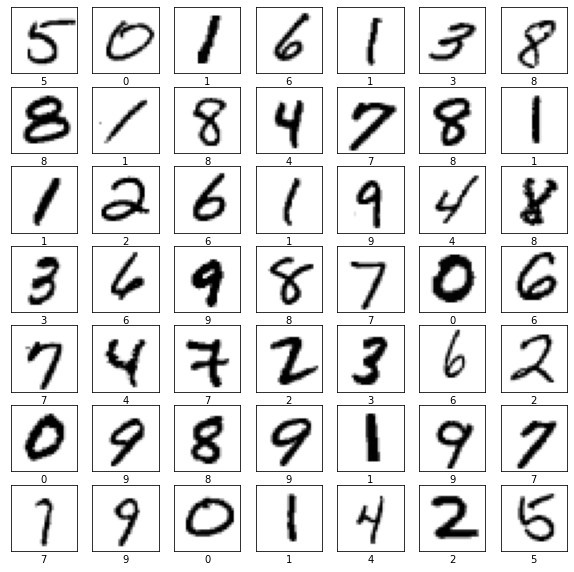

In [61]:
plt.figure(figsize=(10,10))
for i in range(49):
    plt.subplot(7,7,i+1)
    plt.xticks([])
    plt.yticks([])
    plt.grid(False)
    plt.imshow(train_images[i], cmap=plt.cm.binary)
    plt.xlabel(train_labels[i])
plt.show()

By now, you might be well aware about the dataset
> Let's go to Convolution Neural Network Modelling
>> If you dont know much about its theory part, Please spend 5 minutes and check this video
>> https://www.youtube.com/watch?v=6Y4BEwAo1i8


---



In [62]:
from keras.utils import to_categorical
train_images=train_images.reshape((train_images.shape[0], 28, 28, 1))
test_images=test_images.reshape((test_images.shape[0], 28, 28, 1))
val_images=val_images.reshape((val_images.shape[0], 28, 28, 1))
train_images_set1=train_images_set1.reshape((train_images_set1.shape[0], 28, 28, 1))

In [84]:
model = models.Sequential()
model.add(layers.Conv2D(32, (5, 5), activation='relu', input_shape=(28, 28, 1)))
model.add(layers.Conv2D(32, (3, 3), activation='relu', input_shape=(28, 28, 1)))
model.add(layers.Conv2D(32, (3, 3), activation='relu', input_shape=(28, 28, 1)))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Conv2D(16, (3, 3), activation='relu'))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Flatten())
model.add(layers.Dense(40, activation='relu'))
model.add(layers.Dense(20, activation='relu'))
model.add(layers.Dense(10, activation='softmax'))


In the above code, we created a Convolution Neural Network, explaining that in detail...........Be patient if you want to understand.
# The modeled CNN has following architechture


1. layer 1-   Convolution layer ( 32 filters, 3*3 kernel size and ReLU activation funtion)  # for more detail about inbuilt function used - https://keras.io/api/layers/convolution_layers/convolution2d/
2. layer 2- Convolution layer ( 32 filters, 3*3 kernel and ReLU activation funtion) # for more detail about inbuilt function used - https://keras.io/api/layers/convolution_layers/convolution2d/
3. Layer 3- Pooling layer of pool size 2*2, for spatial dimensionality reduction # for more detail about inbuilt function used https://keras.io/api/layers/pooling_layers/max_pooling2d/
4.   Layer 4- Convolution layer( 16 filters, 3*3 kernel and ReLU activation funtion)  # for more detail about inbuilt function used - https://keras.io/api/layers/convolution_layers/convolution2d/
5.   Layer 5- Pooling layer of pool size 2*2, for spatial dimensionality reduction # for more detail about inbuilt function used https://keras.io/api/layers/pooling_layers/max_pooling2d/
6.   Layer 6 is a flattening layer, it is used to flatten the input. For example, if flatten is applied to layer having input shape as (batch_size, 2,2), then the output shape of the layer will be (batch_size, 4) # for more detail about inbuilt function used https://www.tutorialspoint.com/keras/keras_flatten_layers.htm
7.   Layer 7 is a fully connected layer or Dense layer. It uses ReLU activation function. It is like a regular densely-connected NN layer, In the abobe model the output of this layer will have 100 unique outputs or 100 classes # for more detail about inbuilt function used https://www.tensorflow.org/api_docs/python/tf/keras/layers/Dense
8. Layer 8 is also a fully connected layer or Dense layer. It uses softmax activation function. It is like a regular densely-connected NN layer, In the abobe model the output of this layer will have 10 unique outputs or 10 classes # for more detail about inbuilt function used https://www.tensorflow.org/api_docs/python/tf/keras/layers/Dense

# The above model explained was first tried, but it did not yeild good accuracy
# so, methods like, 
Increase hidden Layers. ...
Change Activation function. ...
Change Activation function in Output layer. ...
Increase number of neurons. ..
#were applied
# This was all about the simple Convolution Neural Network modelled in the above code.

The summary of the new model created is here,




In [89]:
model.summary()

Model: "sequential_12"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_29 (Conv2D)           (None, 24, 24, 32)        832       
_________________________________________________________________
conv2d_30 (Conv2D)           (None, 22, 22, 32)        9248      
_________________________________________________________________
conv2d_31 (Conv2D)           (None, 20, 20, 32)        9248      
_________________________________________________________________
max_pooling2d_24 (MaxPooling (None, 10, 10, 32)        0         
_________________________________________________________________
conv2d_32 (Conv2D)           (None, 8, 8, 16)          4624      
_________________________________________________________________
max_pooling2d_25 (MaxPooling (None, 4, 4, 16)          0         
_________________________________________________________________
flatten_12 (Flatten)         (None, 256)             

After model creation, model needs to be compiled. Here, Adam optimization is used.
#Adam optimization 
> The Adam optimization algorithm is an extension to stochastic gradient descent that has recently seen broader adoption for deep learning applications in computer vision and natural language processing.

In [85]:
model.compile(optimizer='adam',
              loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
              metrics=['accuracy'])

Now we will fit the model, using traing data and validation data, using 20 epochs or iterations
# Note: the below step will take time to execute

In [87]:
model_1= model.fit(train_images, train_labels, epochs=50,validation_data=(val_images, val_labels))

Epoch 1/50
1500/1500 [==============================] - 5s 3ms/step - loss: 2.0146 - accuracy: 0.4465 - val_loss: 2.1263 - val_accuracy: 0.3348
Epoch 2/50
1500/1500 [==============================] - 5s 3ms/step - loss: 1.9166 - accuracy: 0.5445 - val_loss: 1.8060 - val_accuracy: 0.6551
Epoch 3/50
1500/1500 [==============================] - 5s 3ms/step - loss: 1.9212 - accuracy: 0.5400 - val_loss: 2.0721 - val_accuracy: 0.3891
Epoch 4/50
1500/1500 [==============================] - 5s 3ms/step - loss: 2.0500 - accuracy: 0.4111 - val_loss: 1.9104 - val_accuracy: 0.5508
Epoch 5/50
1500/1500 [==============================] - 5s 3ms/step - loss: 1.9386 - accuracy: 0.5226 - val_loss: 1.9021 - val_accuracy: 0.5590
Epoch 6/50
1500/1500 [==============================] - 5s 3ms/step - loss: 1.9196 - accuracy: 0.5415 - val_loss: 2.0207 - val_accuracy: 0.4404
Epoch 7/50
1500/1500 [==============================] - 5s 3ms/step - loss: 1.9512 - accuracy: 0.5099 - val_loss: 1.8532 - val_accuracy:

From the above we got the intuition that the first 20 or 15 epochs are sufficient and yeild better result
# now we will again create the another model and train it for 10 epochs

In [103]:
model2 = models.Sequential()
model2.add(layers.Conv2D(32, (3, 3), activation='relu', input_shape=(28, 28, 1)))
model2.add(layers.Conv2D(32, (3, 3), activation='relu', input_shape=(28, 28, 1)))
model2.add(layers.MaxPooling2D((2, 2)))
model2.add(layers.Conv2D(32, (3, 3), activation='relu', input_shape=(28, 28, 1)))
model2.add(layers.Conv2D(32, (3, 3), activation='relu', input_shape=(28, 28, 1)))
model2.add(layers.MaxPooling2D((2, 2)))
model2.add(layers.Conv2D(16, (3, 3), activation='relu'))
model2.add(layers.MaxPooling2D((2, 2)))
model2.add(layers.Flatten())
model2.add(layers.Dense(40, activation='softmax'))
model2.add(layers.Dense(20, activation='softmax'))
model2.add(layers.Dense(10, activation='softmax'))
model2.summary()

Model: "sequential_16"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_41 (Conv2D)           (None, 26, 26, 32)        320       
_________________________________________________________________
conv2d_42 (Conv2D)           (None, 24, 24, 32)        9248      
_________________________________________________________________
max_pooling2d_32 (MaxPooling (None, 12, 12, 32)        0         
_________________________________________________________________
conv2d_43 (Conv2D)           (None, 10, 10, 32)        9248      
_________________________________________________________________
conv2d_44 (Conv2D)           (None, 8, 8, 32)          9248      
_________________________________________________________________
max_pooling2d_33 (MaxPooling (None, 4, 4, 32)          0         
_________________________________________________________________
conv2d_45 (Conv2D)           (None, 2, 2, 16)        

In [104]:
model2.compile(optimizer='adam',
              loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
              metrics=['accuracy'])

In [106]:
model_2= model2.fit(train_images, train_labels, epochs=10,validation_data=(val_images, val_labels))

Epoch 1/10
1500/1500 [==============================] - 5s 3ms/step - loss: 2.2890 - accuracy: 0.1317 - val_loss: 2.3062 - val_accuracy: 0.1115
Epoch 2/10
1500/1500 [==============================] - 5s 3ms/step - loss: 2.2859 - accuracy: 0.1422 - val_loss: 2.2759 - val_accuracy: 0.2116
Epoch 3/10
1500/1500 [==============================] - 5s 3ms/step - loss: 2.2485 - accuracy: 0.2043 - val_loss: 2.1877 - val_accuracy: 0.2700
Epoch 4/10
1500/1500 [==============================] - 5s 3ms/step - loss: 2.1877 - accuracy: 0.2574 - val_loss: 2.1841 - val_accuracy: 0.2586
Epoch 5/10
1500/1500 [==============================] - 5s 3ms/step - loss: 2.2309 - accuracy: 0.1986 - val_loss: 2.2816 - val_accuracy: 0.1392
Epoch 6/10
1500/1500 [==============================] - 5s 3ms/step - loss: 2.2886 - accuracy: 0.1370 - val_loss: 2.3017 - val_accuracy: 0.1120
Epoch 7/10
1500/1500 [==============================] - 5s 3ms/step - loss: 2.2950 - accuracy: 0.1256 - val_loss: 2.2873 - val_accuracy:

After trying a few models, the model below gave good accuracy.
# This is how a simple CNN is implemented

# The final model is implemented below and has been validated with validation data

# And tested with testing data

In [130]:
model3 = tf.keras.models.Sequential([
    tf.keras.layers.Conv2D(16, (3,3), activation='relu', input_shape=(28, 28,1)),
    tf.keras.layers.MaxPooling2D(2,2),
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(512, activation='relu'),
    tf.keras.layers.Dense(256, activation='relu'),
    tf.keras.layers.Dense(10, activation='softmax')
])

In [150]:
model3.summary()

Model: "sequential_27"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_63 (Conv2D)           (None, 26, 26, 16)        160       
_________________________________________________________________
max_pooling2d_49 (MaxPooling (None, 13, 13, 16)        0         
_________________________________________________________________
flatten_24 (Flatten)         (None, 2704)              0         
_________________________________________________________________
dense_53 (Dense)             (None, 512)               1384960   
_________________________________________________________________
dense_54 (Dense)             (None, 256)               131328    
_________________________________________________________________
dense_55 (Dense)             (None, 10)                2570      
Total params: 1,519,018
Trainable params: 1,519,018
Non-trainable params: 0
___________________________________________

In [132]:
model3.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['acc'])

In [133]:
model_3= model3.fit(train_images, train_labels, epochs=10,validation_data=(val_images, val_labels))

Epoch 1/10
1500/1500 [==============================] - 4s 3ms/step - loss: 0.6047 - acc: 0.9378 - val_loss: 0.1213 - val_acc: 0.9688
Epoch 2/10
1500/1500 [==============================] - 4s 2ms/step - loss: 0.0757 - acc: 0.9773 - val_loss: 0.0921 - val_acc: 0.9716
Epoch 3/10
1500/1500 [==============================] - 4s 2ms/step - loss: 0.0550 - acc: 0.9826 - val_loss: 0.1112 - val_acc: 0.9718
Epoch 4/10
1500/1500 [==============================] - 4s 3ms/step - loss: 0.0494 - acc: 0.9851 - val_loss: 0.0858 - val_acc: 0.9794
Epoch 5/10
1500/1500 [==============================] - 4s 2ms/step - loss: 0.0396 - acc: 0.9883 - val_loss: 0.1294 - val_acc: 0.9697
Epoch 6/10
1500/1500 [==============================] - 4s 3ms/step - loss: 0.0372 - acc: 0.9894 - val_loss: 0.0878 - val_acc: 0.9780
Epoch 7/10
1500/1500 [==============================] - 4s 3ms/step - loss: 0.0312 - acc: 0.9910 - val_loss: 0.0924 - val_acc: 0.9814
Epoch 8/10
1500/1500 [==============================] - 4s 3ms

In [135]:
y_test = model3.predict(test_images)

In [161]:
history = model3.fit(train_images, train_labels, epochs=10,validation_data=(test_images, test_labels))

Epoch 1/10
1500/1500 [==============================] - 4s 3ms/step - loss: 0.0177 - acc: 0.9954 - val_loss: 0.1314 - val_acc: 0.9809
Epoch 2/10
1500/1500 [==============================] - 4s 3ms/step - loss: 0.0227 - acc: 0.9950 - val_loss: 0.1270 - val_acc: 0.9799
Epoch 3/10
1500/1500 [==============================] - 4s 3ms/step - loss: 0.0161 - acc: 0.9963 - val_loss: 0.1344 - val_acc: 0.9809
Epoch 4/10
1500/1500 [==============================] - 4s 3ms/step - loss: 0.0219 - acc: 0.9952 - val_loss: 0.1657 - val_acc: 0.9771
Epoch 5/10
1500/1500 [==============================] - 4s 3ms/step - loss: 0.0149 - acc: 0.9965 - val_loss: 0.1553 - val_acc: 0.9786
Epoch 6/10
1500/1500 [==============================] - 4s 3ms/step - loss: 0.0130 - acc: 0.9972 - val_loss: 0.2024 - val_acc: 0.9749
Epoch 7/10
1500/1500 [==============================] - 4s 3ms/step - loss: 0.0202 - acc: 0.9964 - val_loss: 0.2202 - val_acc: 0.9774
Epoch 8/10
1500/1500 [==============================] - 4s 3ms

In [140]:
np.shape(y_test)


(10000, 10)

#Thus using model 3 a test accuracy of 97.92% is reached

In [145]:
import pandas as pd
results = np.argmax(y_test,axis = 1)

results = pd.Series(results,name="Label")

In [146]:
np.shape(results)

(10000,)

In [149]:
from sklearn.metrics import accuracy_score
accuracy_score(test_labels,results)

0.9792